In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from effdet import EfficientDet, DetBenchTrain, get_efficientdet_config
from effdet.config.model_config import efficientdet_model_param_dict
from effdet.efficientdet import HeadNet
from xml.etree import ElementTree as ET
import cv2
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

from matplotlib import pyplot as plt

# Build model & transform

In [2]:
# Function to build effdet model
def create_model(
    num_classes=3, image_size=512, architecture="tf_efficientnetv2_l"
):
    efficientdet_model_param_dict[architecture] = dict(
        name=architecture,
        backbone_name=architecture,
        backbone_args=dict(drop_path_rate=0.2),
        num_classes=num_classes,
        url='', )
    
    config = get_efficientdet_config(architecture)
    config.update({'num_classes': num_classes})
    config.update({'image_size': (image_size, image_size)})
        
    net = EfficientDet(config, pretrained_backbone=True)
    net.class_net = HeadNet(
        config, num_outputs=config.num_classes
    )
    return DetBenchTrain(net, config)

In [3]:
model = create_model()

In [10]:
transforms = A.Compose(
    [
        A.Resize(height=512, width=512, p=1),
        A.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ToTensorV2(p=1)
    ],
    p=1.0,
    bbox_params=A.BboxParams(
        format="pascal_voc", min_area=0, min_visibility=0, label_fields=["labels"]
    )
)

# Load data for inference

In [13]:
annot = '../data/archive/test_zip/test/apple_77.xml'
image_path = '../data/archive/test_zip/test/apple_77.jpg'

In [15]:
img = cv2.imread(image_path)

tree = ET.parse(annot)
root = tree.getroot()
file_name = root.find('filename').text

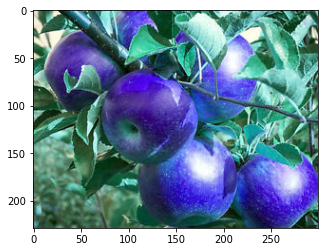

In [17]:
plt.imshow(cv2.cvtColor(img))